In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data  
from datetime import datetime

In [4]:
#Grab stock data from Yahoo

In [5]:
start_date = '2018-01-01'
end_date = '2019-05-01'

tech_list = ['GOOG','MSFT','AMZN','TWTR']

# User pandas_reader.data.DataReader to load the desired data.
GOOG = data.DataReader('GOOG','yahoo',start_date,end_date)
MSFT = data.DataReader('MSFT','yahoo',start_date,end_date)
AMZN = data.DataReader('AMZN','yahoo',start_date,end_date)
TWTR = data.DataReader('TWTR','yahoo',start_date,end_date)

In [6]:
TWTR.describe()
#Adj Close is the adjusted closing price which takes into consideration the changes in the stock

,High,Low,Open,Close,Volume,Adj Close
count,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000
mean,33.507821,32.187373,32.835791,32.851791,2.602774e+07,32.851791
std,5.042724,4.880074,4.986329,4.998984,1.844558e+07,4.998984
min,22.680000,22.040001,22.389999,22.160000,5.813900e+06,22.160000
25%,30.780001,29.425000,30.185000,30.120001,1.580555e+07,30.120001
50%,33.020000,31.650000,32.459999,32.380001,2.103520e+07,32.380001
75%,34.930000,33.875000,34.395000,34.375000,2.958620e+07,34.375000
max,47.790001,45.639999,46.740002,46.759998,1.624344e+08,46.759998


In [7]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2018-01-02 to 2019-05-02
Data columns (total 6 columns):
High         335 non-null float64
Low          335 non-null float64
Open         335 non-null float64
Close        335 non-null float64
Volume       335 non-null int64
Adj Close    335 non-null float64
dtypes: float64(5), int64(1)
memory usage: 18.3 KB


# Stock Basic Analysis - Trend of Adjusted Closing Price and Moving Averages

Adjusted Closing Price Trend for all the stocks

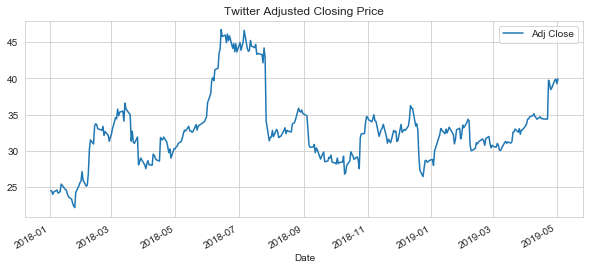

In [8]:
TWTR['Adj Close'].plot(legend=True,figsize=(10,4),title='Twitter Adjusted Closing Price')

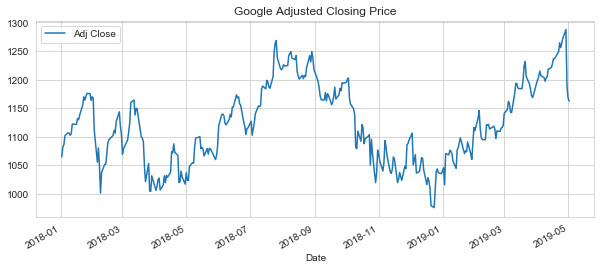

In [9]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4),title='Google Adjusted Closing Price')

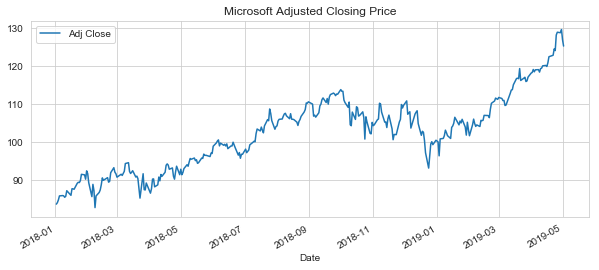

In [10]:
MSFT['Adj Close'].plot(legend=True,figsize=(10,4),title='Microsoft Adjusted Closing Price')

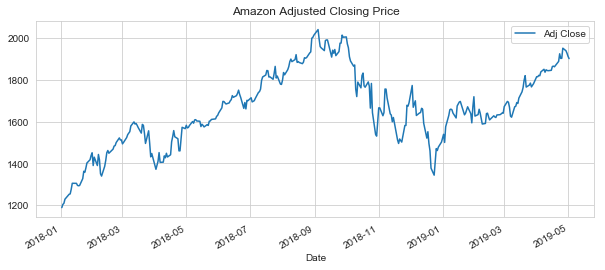

In [11]:
AMZN['Adj Close'].plot(legend=True,figsize=(10,4),title='Amazon Adjusted Closing Price')

In [12]:
GOOG['label'] = 'GOOG'
TWTR['label'] = 'TWTR'
AMZN['label'] = 'AMZN'
MSFT['label'] = 'MSFT'

In [13]:
frames = [GOOG,TWTR,AMZN,MSFT]
all_data = pd.concat(frames)


In [14]:
by_label = all_data.groupby('label')

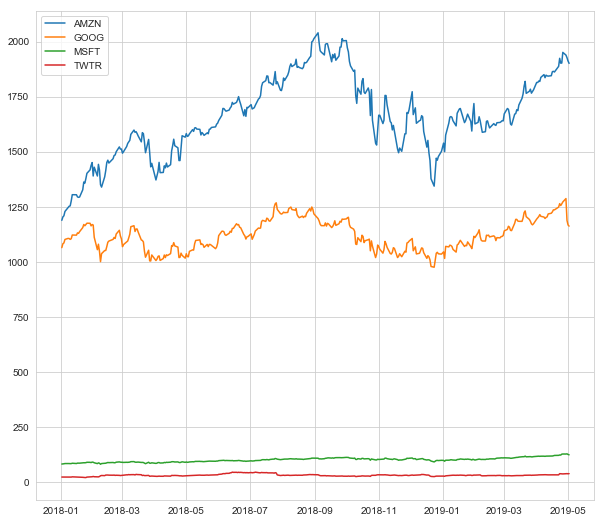

In [15]:
figure(num=None, figsize=(10, 9))
for name, group in by_label:
    plt.plot(group['Adj Close'], label=name)
    
plt.legend()
plt.show()

Stock Volume trend for all the stocks

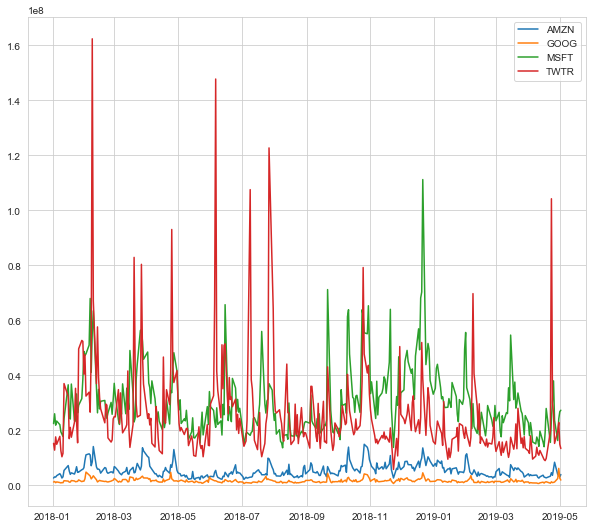

In [16]:
figure(num=None, figsize=(10, 9))
for name, group in by_label:
    plt.plot(group['Volume'], label=name)
    
plt.legend()

Moving Averages for 10,20 and 50 days for Amazon

In [17]:
#moving average = sum of values over n days / n days --> this moves forward with ONE value each time
#Moving averages are used to track and identify trends by smoothing normal day-to-day price fluctuations.

In [18]:
ma_day = [10,20,50] #moving averages days for 3 moving averages
for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))
    AMZN[column_name]= AMZN['Adj Close'].rolling(ma).mean()
    


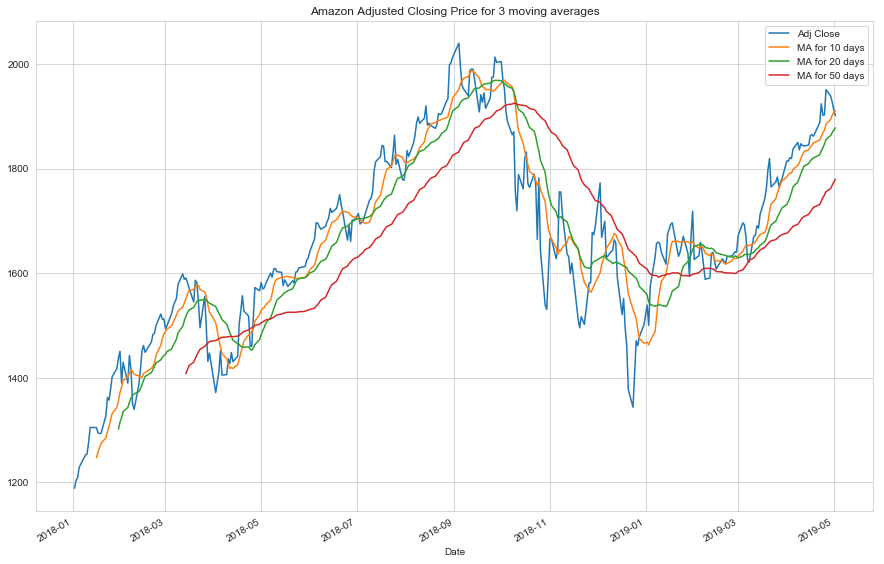

In [19]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,10),title='Amazon Adjusted Closing Price for 3 moving averages')

#smoother the plot , leeser reliant it is on daily fluctuations

# Daily Stock Return Analysis

In [20]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
#it calculates percentage change of current element from the previous element i.e. finding the percent change for each day

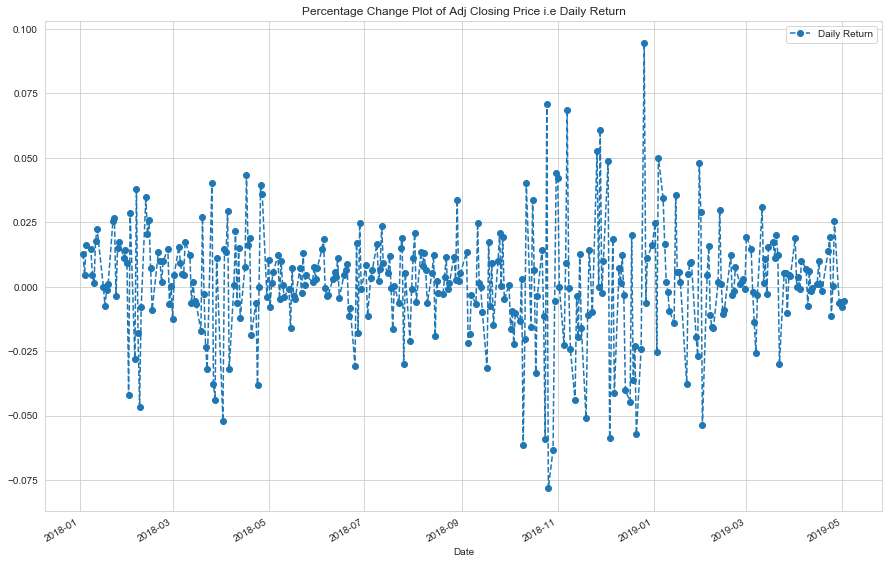

In [21]:
AMZN['Daily Return'].plot(figsize=(15,10),legend=True,linestyle='--',marker='o',title='Percentage Change Plot of Adj Closing Price i.e Daily Return')
#Below helps to answer, on a given day, did you earn more money or did you lose

Average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

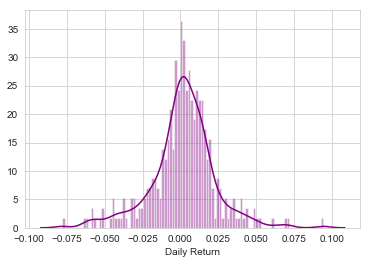

In [22]:
#distplot allows to plot two graphs on top of each other
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='purple') 


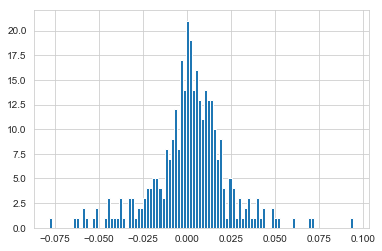

In [23]:
AMZN['Daily Return'].hist(bins=100)

Analyzing the returns of all the stocks in our list. Building a DataFrame with all the ['Close'] columns for each of the stocks dataframes. 

In [24]:
# Grabing all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(tech_list,'yahoo',start_date,end_date)['Adj Close']

In [25]:
closing_df.head()

Symbols,AMZN,GOOG,MSFT,TWTR
Date,,,,
2018-01-02,1189.010010,1065.000000,83.539680,24.510000
2018-01-03,1204.199951,1082.479980,83.928474,24.450001
2018-01-04,1209.589966,1086.400024,84.667145,23.990000
2018-01-05,1229.140015,1102.229980,85.716881,24.320000
2018-01-08,1246.869995,1106.939941,85.804337,24.590000


In [26]:
tech_rts = closing_df.pct_change()

In [27]:
tech_rts.head()

Symbols,AMZN,GOOG,MSFT,TWTR
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.012775,0.016413,0.004654,-0.002448
2018-01-04,0.004476,0.003621,0.008801,-0.018814
2018-01-05,0.016163,0.014571,0.012398,0.013756
2018-01-08,0.014425,0.004273,0.001020,0.011102


comparing the daily percentage return of two stocks to check how they are correlated.

C:\Users\sheth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


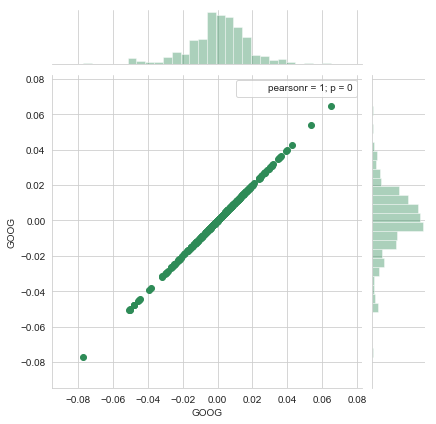

In [28]:
from scipy import stats
# Comparing Google to itself just to see how pefect the linear relationship is
sns.jointplot('GOOG','GOOG',tech_rts,kind='scatter',color='seagreen').annotate(stats.pearsonr)

comparing Google and Amazon


C:\Users\sheth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


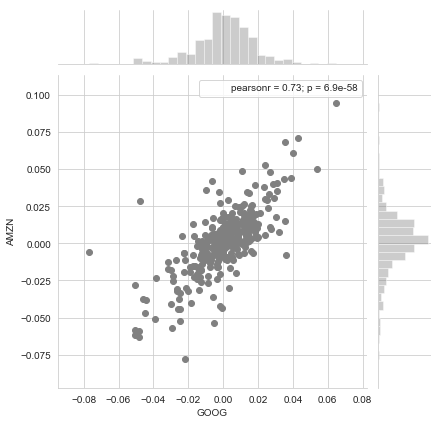

In [29]:
import scipy.stats as stats
sns.jointplot('GOOG','AMZN',tech_rts,kind='scatter',color='grey').annotate(stats.pearsonr)
#Pearson correlation coefficient = 
#where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

comparing microsoft and twitter

C:\Users\sheth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


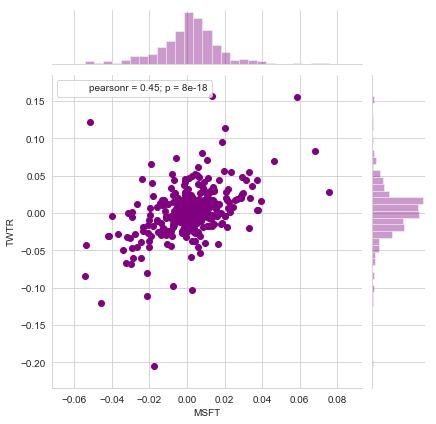

In [30]:
sns.jointplot('MSFT','TWTR',tech_rts,kind='scatter',color='purple').annotate(stats.pearsonr)

C:\Users\sheth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


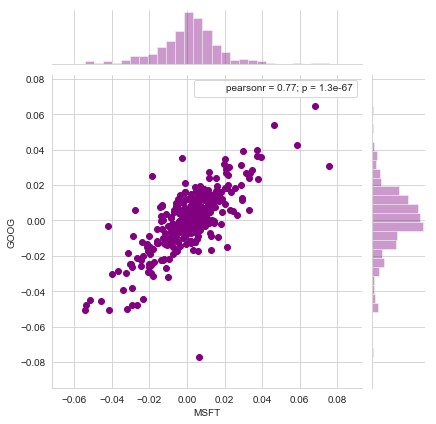

In [74]:
sns.jointplot('MSFT','GOOG',tech_rts,kind='scatter',color='purple').annotate(stats.pearsonr)

comparing Amazon and Twitter

C:\Users\sheth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


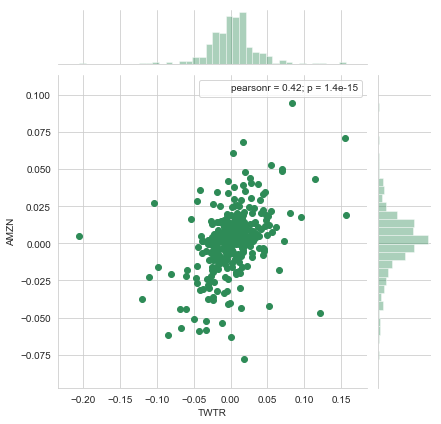

In [31]:
sns.jointplot('TWTR','AMZN',tech_rts,kind='scatter',color='seagreen').annotate(stats.pearsonr)

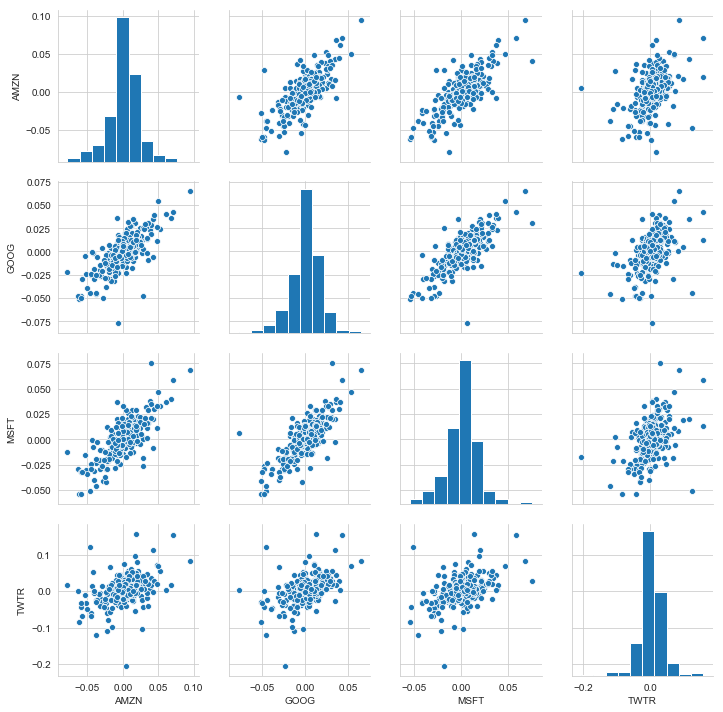

In [32]:
# callin pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rts.dropna())

In [33]:
#using sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, 
#the upper triangle, and the lower triangle.

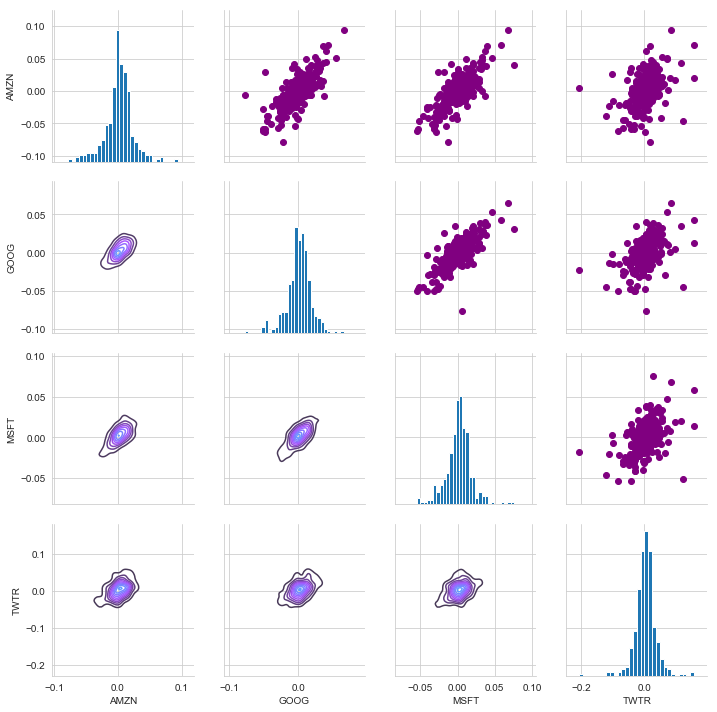

In [34]:
#  calling PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rts.dropna())

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

#setting lower triangle type as kde
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

#Now Analysing the correlation of the closing prices using this exact same technique.

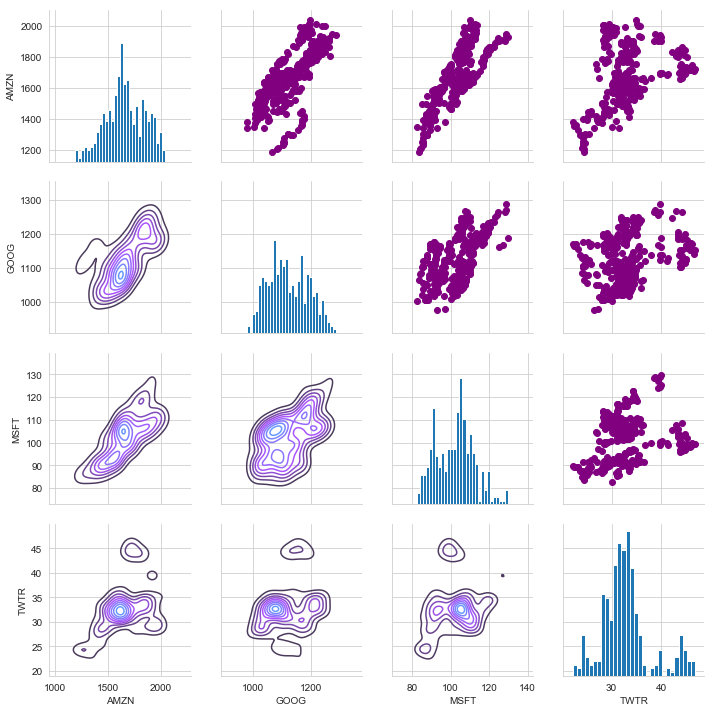

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Numeric Correlation using Heatmap

In [50]:
corr = tech_rts.dropna().corr()
corr

Symbols,AMZN,GOOG,MSFT,TWTR
Symbols,,,,
AMZN,1.000000,0.734642,0.755439,0.418251
GOOG,0.734642,1.000000,0.773043,0.471114
MSFT,0.755439,0.773043,1.000000,0.447184
TWTR,0.418251,0.471114,0.447184,1.000000


In [51]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

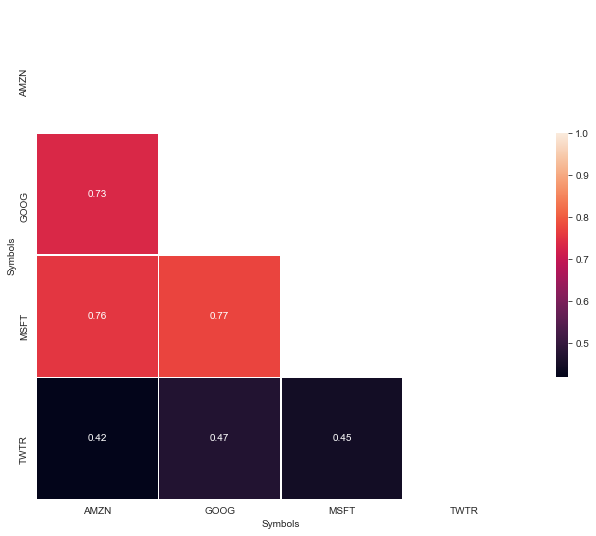

In [62]:
# Generate a custom diverging colormap
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(-1, 1, as_cmap=True)
sns.heatmap(corr, mask=mask , annot=True ,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
corr2 = closing_df.dropna().corr()
corr2

Symbols,AMZN,GOOG,MSFT,TWTR
Symbols,,,,
AMZN,1.000000,0.691947,0.804274,0.419345
GOOG,0.691947,1.000000,0.587494,0.300193
MSFT,0.804274,0.587494,1.000000,0.246177
TWTR,0.419345,0.300193,0.246177,1.000000


In [66]:
# Generate a mask for the upper triangle
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

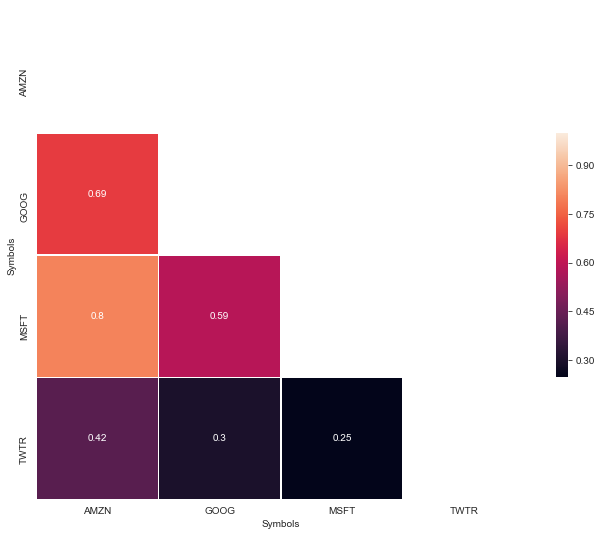

In [67]:
# Generate a custom diverging colormap
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(-1, 1, as_cmap=True)
sns.heatmap(corr2, mask=mask2 , annot=True ,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

So it can be seen that Amazon and Google had the strongest correlation of daily stock return. Also, it can be seen that all the technology comapnies are positively correlated.

# Risk Analysis

Will be analysing risk by comparing the expected return with the standard deviation of the daily returns

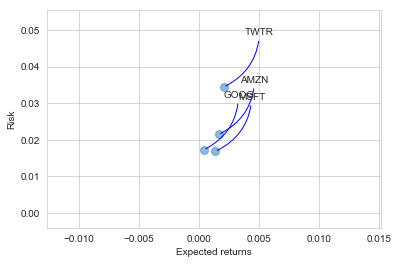

In [73]:
rets = tech_rts.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


#Setting the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Labeling the scatter plots
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='blue' ,connectionstyle = 'arc3,rad=-0.3'))

Best stock to invest would be one with lower risk and higher expected returns i.e Microsoft

# Value Risk using Bootstrap and Monte Carlo

value at risk is the amount of money we could expect to lose (aka putting at risk) for a given confidence interval

Value at risk using the "bootstrap" method - For this we will calculate  empirical quantiles from a histogram of daily returns

quartiles are the three cut points that will divide a dataset into four equal-sized groups

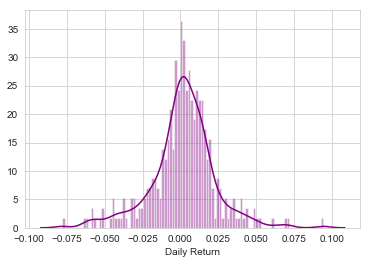

In [77]:
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='purple')

In [80]:
rets.head()

Symbols,AMZN,GOOG,MSFT,TWTR
Date,,,,
2018-01-03,0.012775,0.016413,0.004654,-0.002448
2018-01-04,0.004476,0.003621,0.008801,-0.018814
2018-01-05,0.016163,0.014571,0.012398,0.013756
2018-01-08,0.014425,0.004273,0.001020,0.011102
2018-01-09,0.004676,-0.000614,-0.000680,-0.017080


In [81]:
# The 0.05 empirical quantile of daily returns
rets['AMZN'].quantile(0.05)

-0.03789040561734094

0.05 empiricle quantile of daily return is at -0.03 meaning that with 95% confidence, the maximum daily loss would be 3.789%

Value at risk using the "monte carlo" method 